In [1]:
pwd

'C:\\Users\\kesha\\Desktop\\SakshiBharatInternProjects'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = pd.read_csv("C:\\Users\\kesha\\Desktop\\SakshiBharatInternProjects\\NFLX.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-07,261.059998,261.149994,252.089996,258.600006,258.600006,7927000
1,2022-11-08,259.920013,266.079987,256.880005,263.459991,263.459991,7683800
2,2022-11-09,259.660004,260.899994,254.220001,254.660004,254.660004,7266000
3,2022-11-10,265.989990,275.359985,260.089996,274.970001,274.970001,9667300
4,2022-11-11,274.470001,290.660004,271.559998,290.130005,290.130005,9573800


In [4]:
data = data['Close'].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

In [7]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

In [8]:
sequence_length = 10

In [9]:
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
6/6 [==============================] - 15s 31ms/step - loss: 0.1953
Epoch 2/20
6/6 [==============================] - 0s 32ms/step - loss: 0.0330
Epoch 3/20
6/6 [==============================] - 0s 36ms/step - loss: 0.0266
Epoch 4/20
6/6 [==============================] - 0s 31ms/step - loss: 0.0099
Epoch 5/20
6/6 [==============================] - 0s 33ms/step - loss: 0.0138
Epoch 6/20
6/6 [==============================] - 0s 38ms/step - loss: 0.0093
Epoch 7/20
6/6 [==============================] - 0s 33ms/step - loss: 0.0076
Epoch 8/20
6/6 [==============================] - 0s 35ms/step - loss: 0.0073
Epoch 9/20
6/6 [==============================] - 0s 31ms/step - loss: 0.0063
Epoch 10/20
6/6 [==============================] - 0s 33ms/step - loss: 0.0060
Epoch 11/20
6/6 [==============================] - 0s 39ms/step - loss: 0.0057
Epoch 12/20
6/6 [==============================] - 0s 35ms/step - loss: 0.0056
Epoch 13/20
6/6 [==============================] - 0s 33ms/s

In [13]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 3s 13ms/step


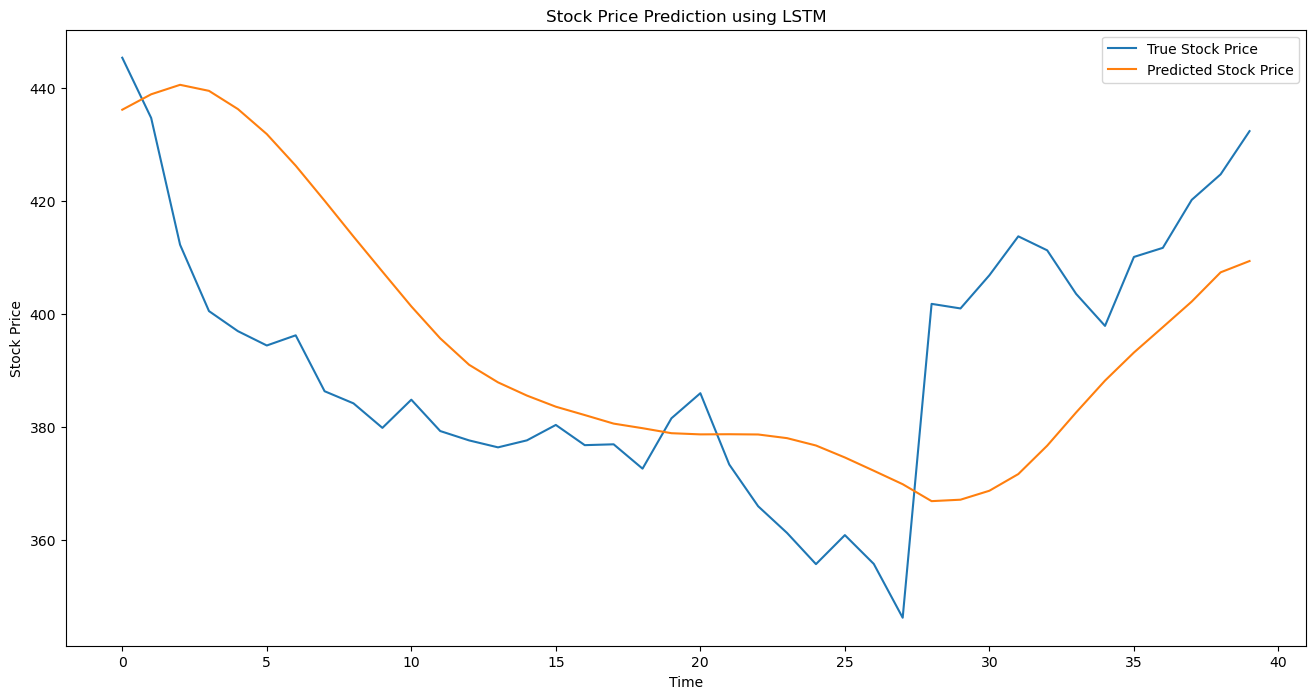

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(data[len(data) - len(predictions):], label='True Stock Price')
plt.plot(predictions, label='Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()